In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Load your data into a pandas DataFrame
# Assuming your DataFrame is named 'df' and contains features and continuous target variable

# Example data (replace this with your actual data loading code)

df = pd.read_excel('pigeonpea_produce.xlsx')
print(df.head())
df=df.dropna()
# Define features and target variable
X, y = df.drop('PIGEONPEA YIELD', axis=1), df[['PIGEONPEA YIELD']]
print(X.head())

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression



   PIGEONPEA AREA (1000 ha)    Year precipitaion(cm)  IRRIGATION(Mha)  \
0                   3586.08  1966.0              103            28.00   
1                   5761.39  1967.0            111.5            29.25   
2                   4008.26  1968.0            101.9            30.50   
3                   5301.76  1969.0            109.2            31.75   
4                   5207.78  1970.0            125.3            33.00   

   MECHANISATION COEF.  AGRICULTURE BUDGET  Pigeonpea yield last year  \
0                 2.97              2254.0                    2548.63   
1                 4.00              2366.0                    2534.07   
2                 5.03              2582.0                    2596.25   
3                 6.06              3052.0                    2577.45   
4                 7.09              3455.0                    2647.26   

   PIGEONPEA YIELD  
0          2534.07  
1          2596.25  
2          2577.45  
3          2647.26  
4          2595.4

Mean Squared Error: 55922.23562826632
R-squared Score: 0.8190626405694202
year original predicted based on previous data
1966 2534.07     [2420.00238599]
1967 2596.25     [2471.33386709]
1968 2577.45     [2457.11121219]
1969 2647.26     [2495.94725618]
1970 2595.44     [2593.8758977]
1971 2302.89     [2572.94014716]
1972 2421.51     [2385.01708437]
1973 2605.98     [2594.53183771]
1974 2532.07     [2640.75347769]
1975 2697.95     [2756.15356626]
1976 2551.49     [2774.20988145]
1977 2605.93     [2778.95243325]
1978 2653.67     [2818.39293717]
1979 2635.1     [2784.71122148]
1980 2782.55     [2896.48525234]
1981 2941.7     [2990.32916935]
1982 2809.03     [3034.87289152]
1983 3159.13     [3072.20515129]
1984 3180.5     [3150.82086779]
1985 3209.36     [3178.38729481]
1986 3221.33     [3172.3621438]
1987 3284.19     [3159.2256212]
1988 3538.65     [3304.989458]
1989 3547.62     [3324.82668612]
1990 3618.0     [3413.13586838]
1991 3642.55     [3373.32408943]
1992 3591.36     [3368.0246527

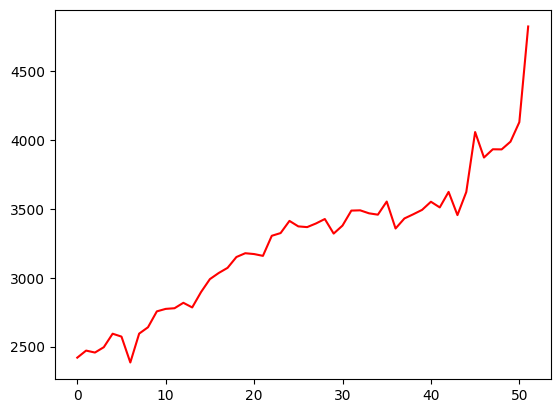

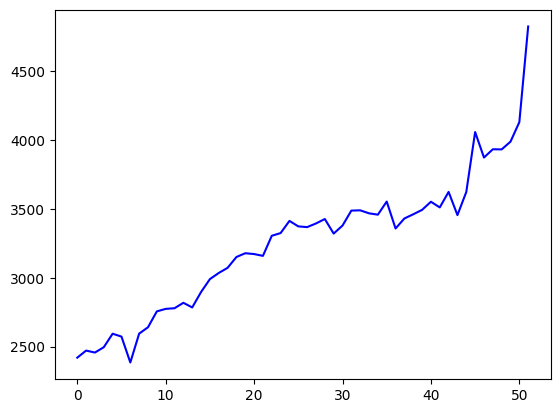

In [6]:
degree = 1  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X)
X_test_poly = poly_features.transform(X)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_poly, y)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

list_given=y['PIGEONPEA YIELD']
avg=0
print('year' , 'original' , 'predicted based on previous data')
for el in range(len(list_given)):
    print(1966+el,list_given[el], "   ", y_pred[el])
    avg+=(list_given[el]-y_pred[el])**2
print((avg/51)**(1/2))

plt.plot(y_pred,color='red')
plt.show()
plt.plot(y_pred,color='blue')
plt.show()
